# Importing necessary libraries

In [65]:
import pandas as pd # data manipulation and analysis
import numpy as np # statistical and numerical computing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

# Data Inspection

In [4]:
# Loading datasets
df = pd.read_csv("/media/rajendra_/A0A80645A8061A84/Data science/Project/data/diabetes.csv")

### About Datasets
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [6]:
df.head() # first five rows of the DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Profiling

In [7]:
df.shape # shape of the datasets

(768, 9)

DataFrame contains 768 rows and 9 columns.

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

DataFrame consists of 7 integer datatypes and 2 float datatypes.

In [9]:
df.columns # all the columns of the dataframe

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above information, we can see 768 entries, 9 columns, all the columns name, Non-Null value count, Dtype, and memory usuage.

In [11]:
df.describe() # descriptive statistics of numerical data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here we can see in Pregnancies columns, total count is 768, mean value is 3.84, std is 3.36, min value is 0, max value is 17. And as Pregnancies in all columns in the dataframe has its own mean, std, min value, max value.

In [12]:
df.corr() # correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


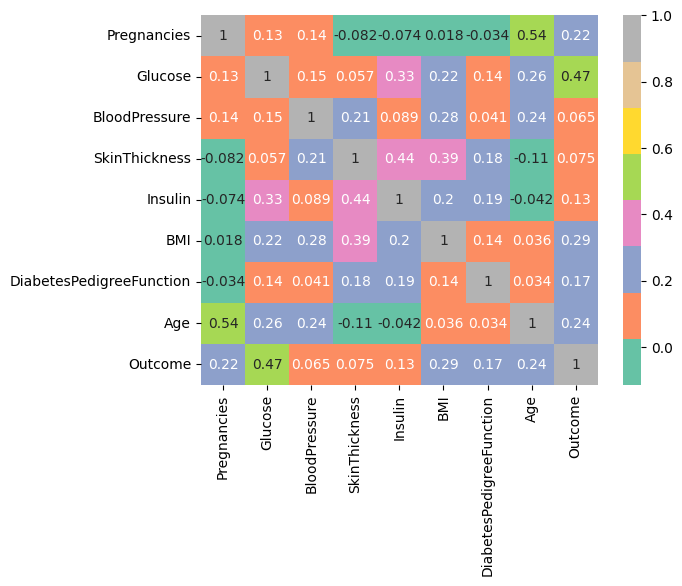

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="Set2")  # visualization of correlation
plt.show()

From above heatmap we can see that `Glucose`, `BMI`, and `Age` are more correlated with target variable `outcome` than other columns.

#### Missing values

In [15]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values in the DataFrame.

# Elaboratory Data Analysis(EDA)

#### Univariate analysis

In [25]:
# function to create univariate analysis of columns in the dataframe
def univariate_histplot(data, column):
    """
    function to create univariate analysis of columns in dataframe using histogram plot
    Takes dataframe and columns as argument
    Returns histogram of the columns
    """

    # mean
    mean = df[column].mean()
    # median
    median = df[column].median()
    # skew
    skew = df[column].skew()

    # histogram
    sns.histplot(data[column], kde=True)

    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    plt.legend()

    # title of the histogram
    plt.title(f"Distribution plot of {column} in the DataFrame, skew = {round(skew, 2)}")


#### Pregnancies column

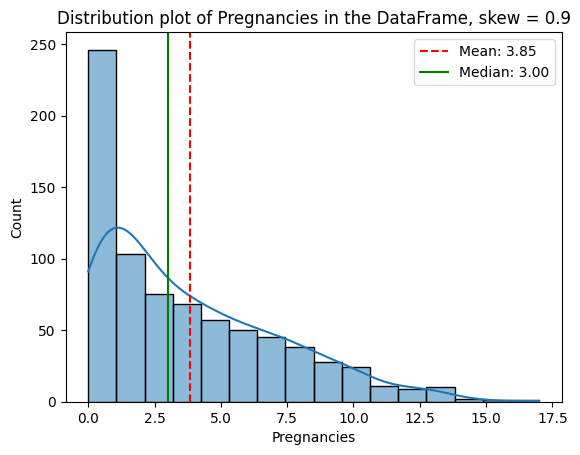

In [26]:
univariate_histplot(data=df, column="Pregnancies")

Mean is 3.85, Median is 3 and skew is 0.9 that means data in the `pregnancies` columns are highly positively skewed.

#### Glucose column

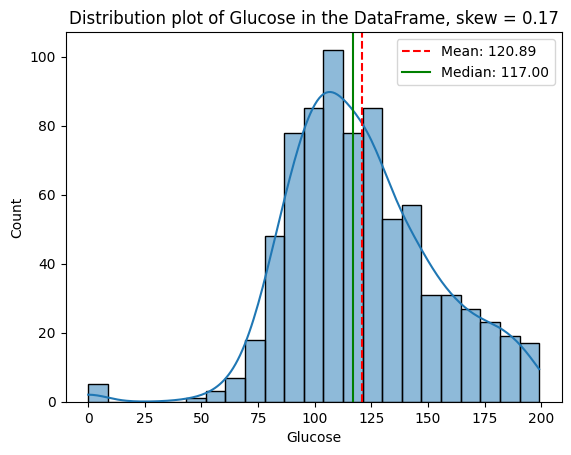

In [27]:
univariate_histplot(data=df, column="Glucose")

Data in the `glucose` columns are slightly positively skewed.

#### BloodPressure

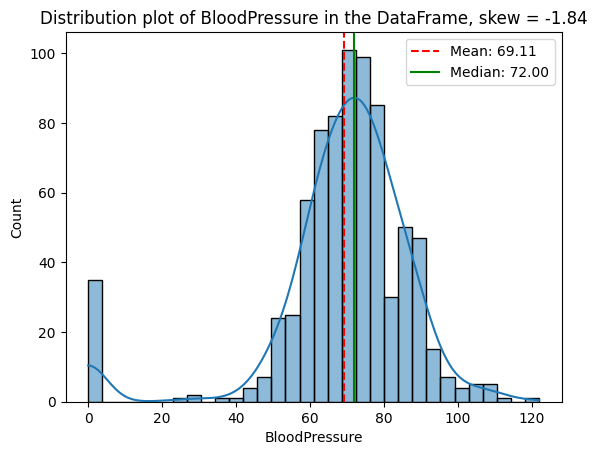

In [28]:
univariate_histplot(data=df, column="BloodPressure")

Data in the `BloodPressure` columns are left skewed.

#### SkinThickness

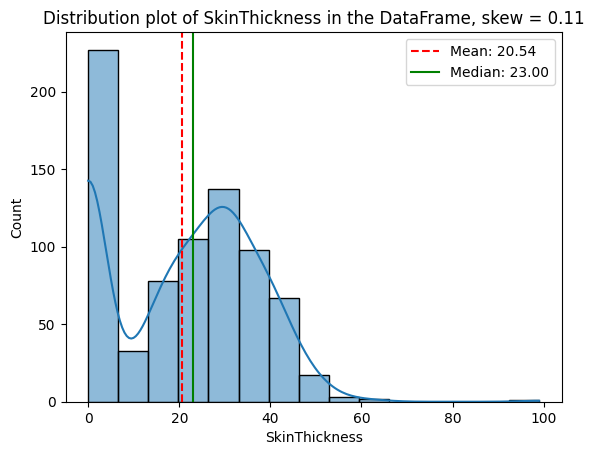

In [29]:
univariate_histplot(data=df, column="SkinThickness")

Data in the SkinThickness columns are slightly right skewed.

##### Insulin

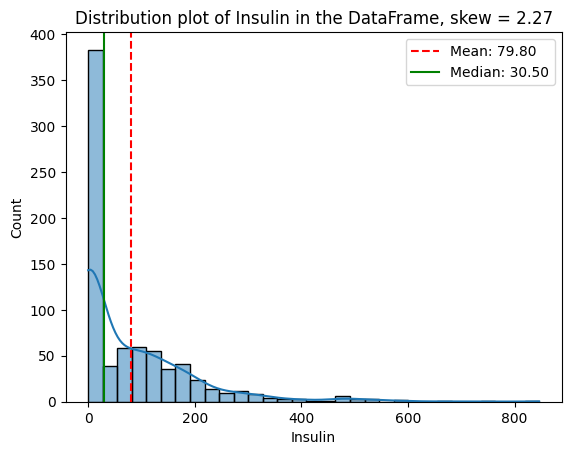

In [30]:
univariate_histplot(data=df, column="Insulin")

Data in the Insulin columns are highly right skewed.

#### BMI

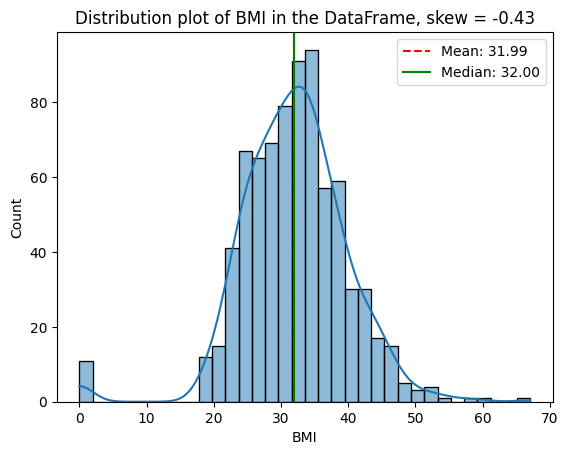

In [31]:
univariate_histplot(data=df, column="BMI")

Data in the BMI columns are  slightly negetivly skewed.

#### DiabetesPedigreeFunction

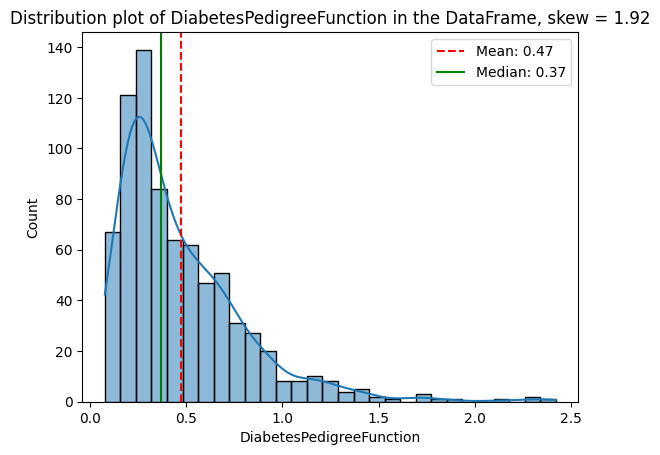

In [32]:
univariate_histplot(data=df, column="DiabetesPedigreeFunction")

#### Age column

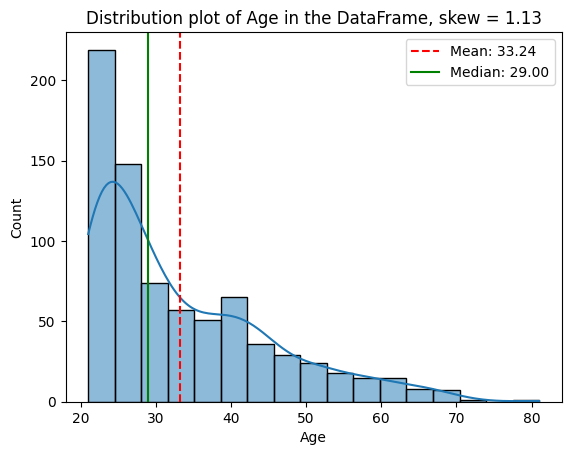

In [33]:
univariate_histplot(data=df, column="Age")

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Target value analysis

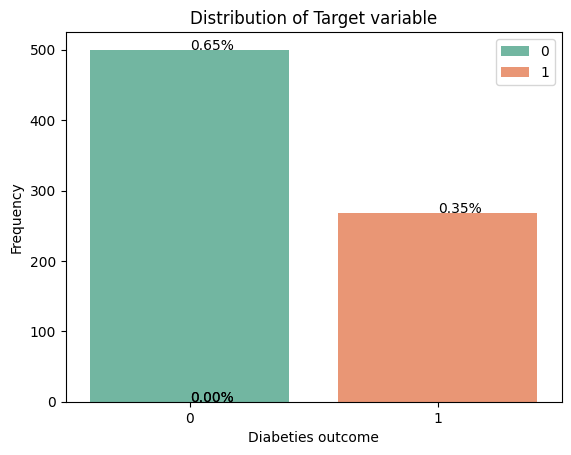

In [35]:
data = df["Outcome"].value_counts()
ax = sns.countplot(data=df, x="Outcome", palette="Set2", hue="Outcome")

for p in ax.patches:
    ax.annotate(f"{(p.get_height() / len(df)):.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()))

plt.title("Distribution of Target variable")
plt.xlabel("Diabeties outcome")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Target variable is imbalanced data since people who have diabeties are 0.65% and who have diabeties are 0.35%.

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Outlier detection

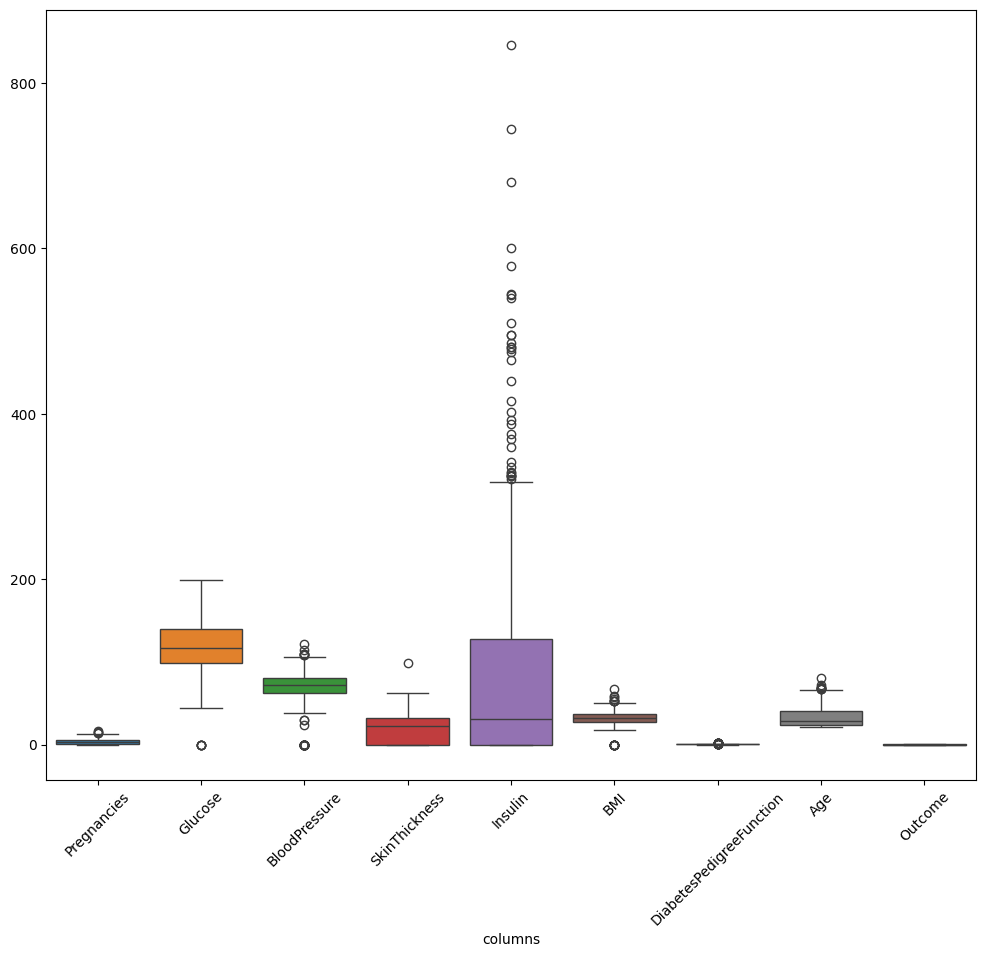

In [37]:
plt.figure(figsize=(12, 10))
sns.boxplot(df)
plt.xticks(rotation=45)

plt.xlabel("columns")

plt.show()

It looks like Insulin columns consists of outliers.

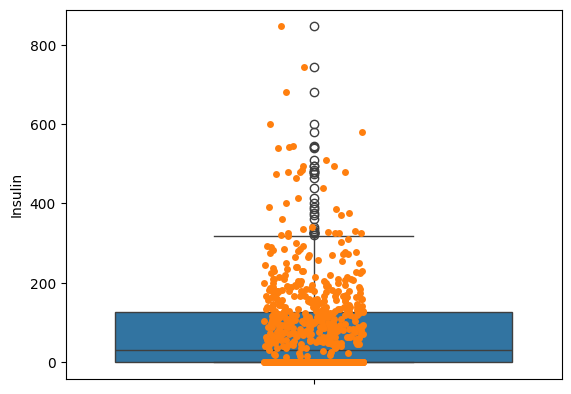

In [13]:
sns.boxplot(df["Insulin"])
sns.stripplot(df["Insulin"])
plt.show()

<Axes: ylabel='BMI'>

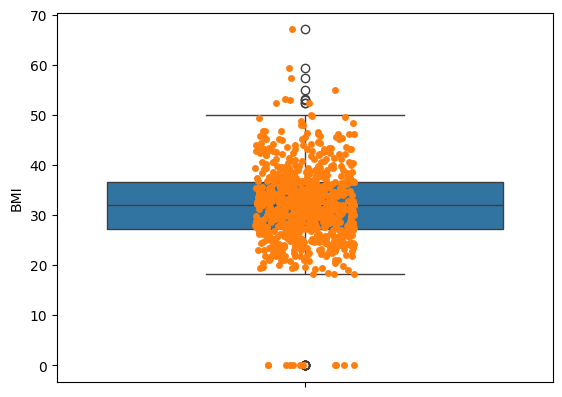

In [14]:
sns.boxplot(df["BMI"])
sns.stripplot(df["BMI"])

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Bivariate Analysis

In [45]:
# bivariate analysis using scatterplot
def scatter_plot(data, x, y, label="Outcome"):
    data.sort_values(label).plot.scatter(
        x=x,
        y=y,
        c=label,
        colormap=sns.color_palette("flare", as_cmap=True),
        figsize=(10, 10),
    )
    plt.title(f"Relation between {x} and {y}")


#### Relation between DiabetesPedigreeFunction and Age

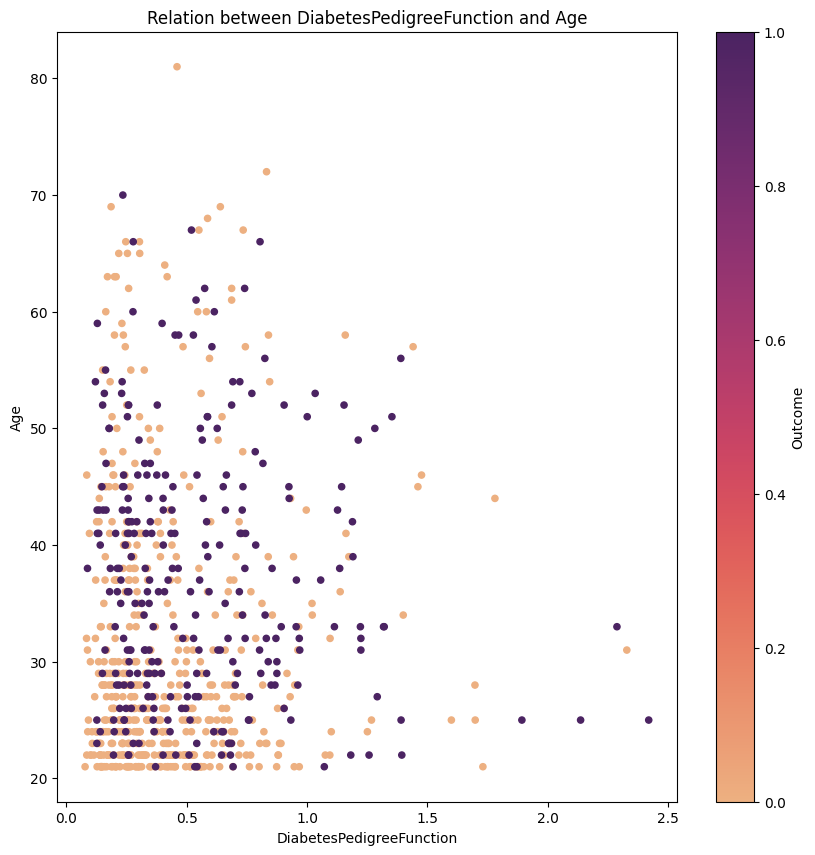

In [46]:
scatter_plot(data=df, x="DiabetesPedigreeFunction", y="Age")

#### Relation between Pregnancies and Age

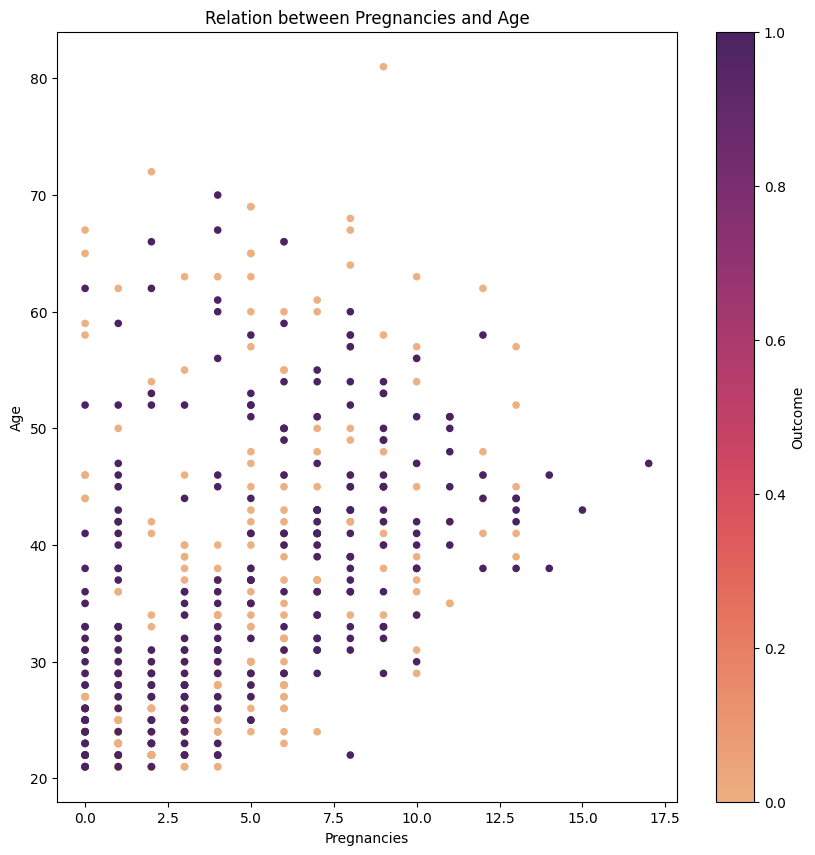

In [47]:
scatter_plot(data=df, x="Pregnancies", y="Age")

#### Relation between BloodPressure and Age

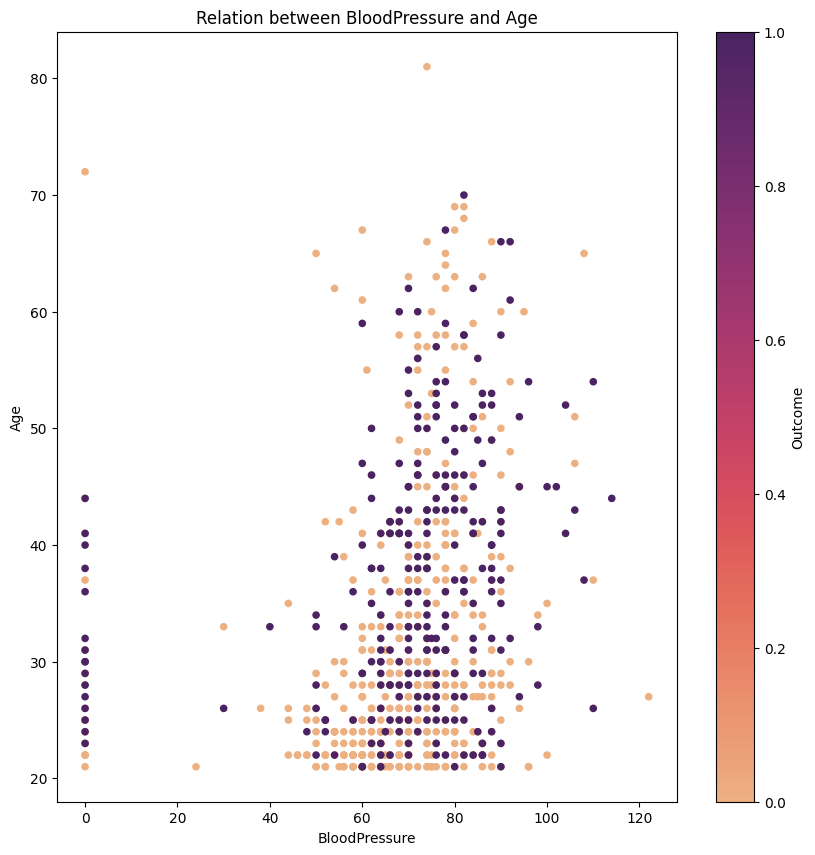

In [48]:
scatter_plot(data=df, x="BloodPressure", y="Age")

#### Relation between BloodPressure and BMI

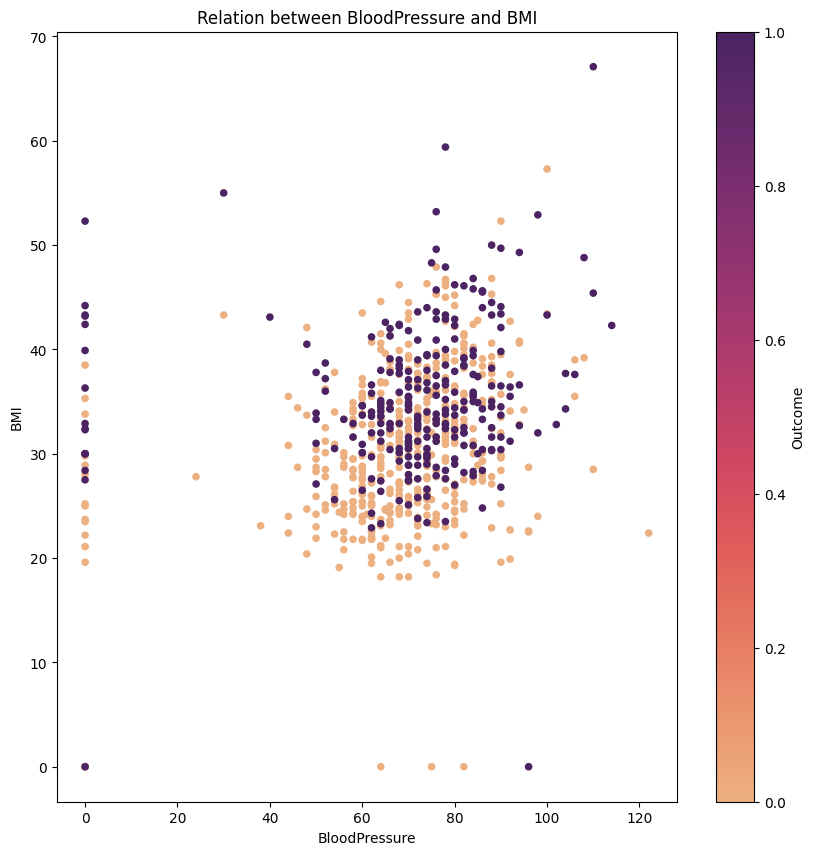

In [49]:
scatter_plot(data=df, x="BloodPressure", y="BMI")

In [86]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Model Selection

In [50]:
df_copy = df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
feature = df_copy.drop("Outcome", axis="columns")

In [52]:
feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [53]:
target = df_copy["Outcome"]
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [93]:
X = feature
y = target

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Model Training

#### Model Training using LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=2)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [97]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [98]:
# coefficient
m = model.coef_
m

array([[ 0.09073884,  0.03387601, -0.01370969,  0.00459926, -0.00139615,
         0.08793938,  0.80756849,  0.02008209]])

In [99]:
# intercept
c = model.intercept_
c

array([-8.15309113])

#### Evaluation

In [100]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [101]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8246753246753247
Precision: 0.8199024206283736
Recall: 0.8246753246753247
F1 Score: 0.8189313719780615
Confusion Matrix:
[[98  9]
 [18 29]]


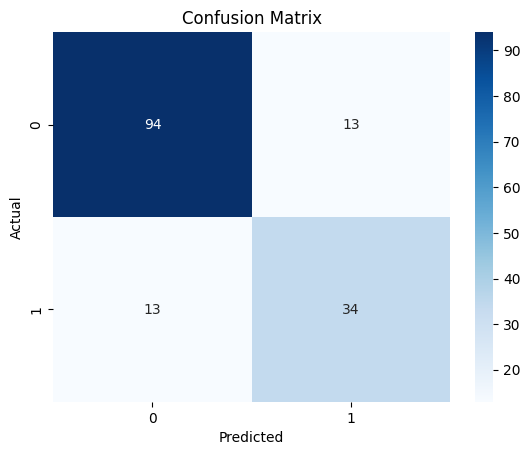

In [107]:
# Confusion Matrix Visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Model Training using Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


DecisionTreeClassifier(random_state=42)

In [109]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7792207792207793
Precision: 0.7885225180199961
Recall: 0.7792207792207793
F1 Score: 0.7826598401598402
Confusion Matrix:
[[87 20]
 [14 33]]


#### Model training using KNN classifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
# Assuming X_train, X_test, y_train, y_test are already defined

# 4. Initialize and Train the KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test)

# 6. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# 7. Visualize the Confusion Matrix
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


Accuracy: 0.7532467532467533
Precision: 0.7563212297906176
Recall: 0.7532467532467533
F1 Score: 0.7546531691578862
Confusion Matrix:
[[87 20]
 [18 29]]


#### Model training using RandomForestClassifier

In [102]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
#### Model Evaluation

In [104]:
y_pred = model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [106]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8311688311688312
Precision: 0.8311688311688312
Recall: 0.8311688311688312
F1 Score: 0.8311688311688312
Confusion Matrix:
[[94 13]
 [13 34]]


#### Hyperparameter Tuning using GridSearchCV 

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [74]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7638131675434402


In [76]:
# Re-train with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [77]:
y_pred_best = best_model.predict(X_test)

In [78]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

In [79]:
print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1 Score: {f1_best}')

Best Model Accuracy: 0.8246753246753247
Best Model Precision: 0.8220188902007084
Best Model Recall: 0.8246753246753247
Best Model F1 Score: 0.8229972792184774
